# COVID-19 Vaccination Data Analysis

This notebook explores COVID-19 vaccination trends globally, with a specific focus on South Africa. We'll examine the vaccination rollout over time, the percentage of vaccinated populations, and compare vaccination rates across countries.

**Objectives:**
- Visualize vaccination trends over time for South Africa.
- Compare vaccination percentages across the top countries.


In [1]:
import pandas as pd
from matplotlib import pyplot as plt

#Data Loading

df = pd.read_csv('owid-covid-data.csv')

#Check columns: df.columns
print("Columns: ")
print(df.columns)

#Preview rows: df.head()
print("Preview of Rows: ")
print(df.head())

#Identify missing values: df.isnull().sum()
print("\n Number of null values: \n",df.isnull().sum())

Columns: 
Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',

In [2]:
# --Data Cleaning

#Countries of Interest South Africa

south_africa = df[df['location'] == 'South Africa']
botswana = df[df['location'] == 'Botswana']

df.dropna(inplace=True) #edit original data to remove null values

#Convert date

df['date'] = pd.to_datetime(df['date'], errors='coerce')

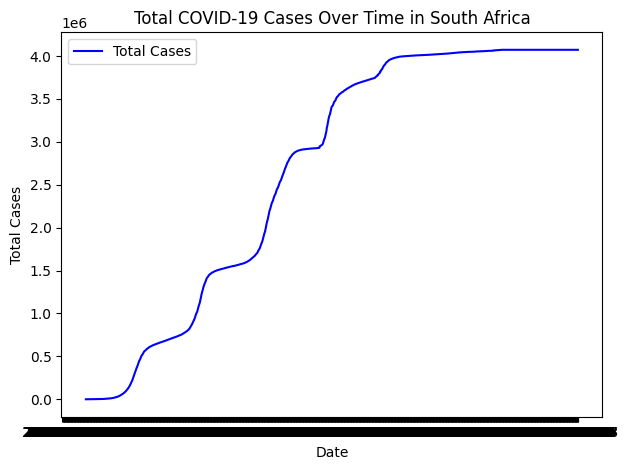

In [3]:
# --Exploratory Data Analysis

#Total cases for south africa

plt.plot(south_africa['date'], south_africa['total_cases'], label='Total Cases', color='blue')

plt.title('Total COVID-19 Cases Over Time in South Africa')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.tight_layout()
plt.show()


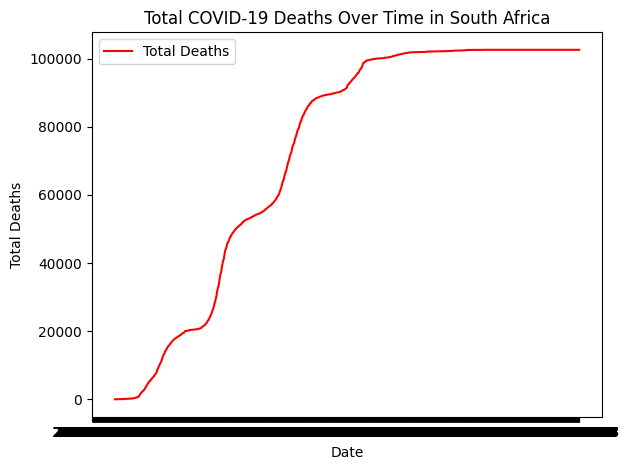

In [4]:
#Total Deaths for south africa

plt.plot(south_africa['date'], south_africa['total_deaths'], label='Total Deaths', color='red')

plt.title('Total COVID-19 Deaths Over Time in South Africa')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.tight_layout()
plt.show()

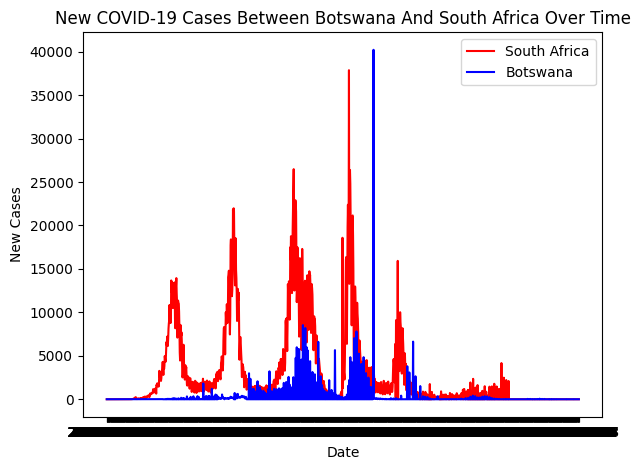

In [5]:
#Compare daily new cases between countries.

plt.plot(south_africa['date'], south_africa['new_cases'], label='South Africa', color='red')
plt.plot(botswana['date'], botswana['new_cases'], label='Botswana', color='blue')

plt.title('New COVID-19 Cases Between Botswana And South Africa Over Time')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.tight_layout()
plt.show()


In [6]:
#Calculate the death rate

total_deaths = south_africa['total_deaths'].iloc[-1]
total_cases = south_africa['total_cases'].iloc[-1]

death_rate = float(total_deaths) / float(total_cases)

print(f"\n The death rate of South Africa due to COVID-19 is: {death_rate * 100:.2f}%")


 The death rate of South Africa due to COVID-19 is: 2.52%


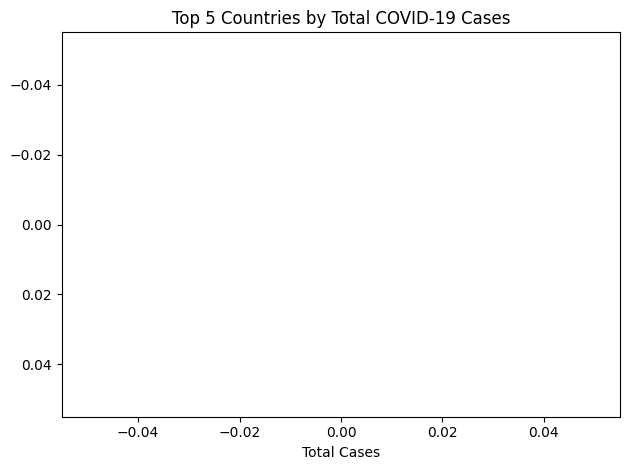

In [7]:
#Bar charts (top countries by total cases)

latest_data = df.sort_values('date').groupby('location').last().reset_index()

# Sort by total_cases
top_countries = latest_data.sort_values('total_cases', ascending=False).head(5)  # Show top 5

# Plot
plt.barh(top_countries['location'], top_countries['total_cases'], color='blue')
plt.xlabel('Total Cases')
plt.title('Top 5 Countries by Total COVID-19 Cases')
plt.gca().invert_yaxis()  # Highest at top
plt.tight_layout()
plt.show()

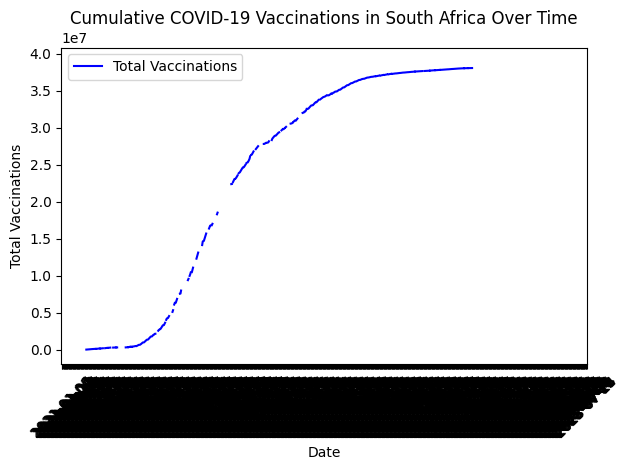

In [8]:
# --Visualizing Vaccination Progress

# Plot cumulative vaccinations over time
plt.plot(south_africa['date'], south_africa['total_vaccinations'], color='blue', label='Total Vaccinations')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.title('Cumulative COVID-19 Vaccinations in South Africa Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

D:\Windows\ipykernel_23384\3103784020.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_africa.loc[:, 'vaccination_percentage'] = (


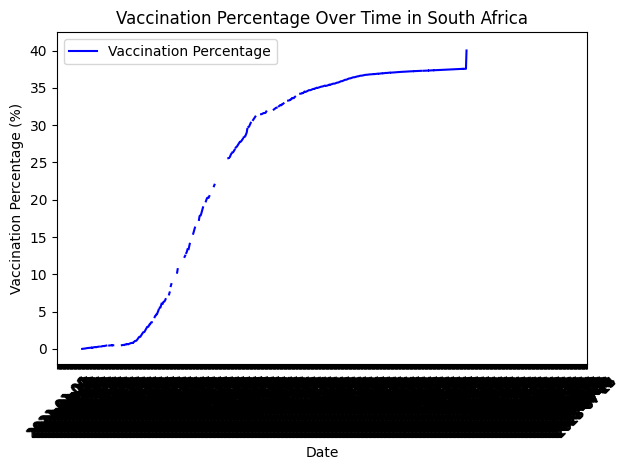

In [10]:
#Compare % vaccinated population.

# Calculate vaccination percentage
south_africa.loc[:, 'vaccination_percentage'] = (
    south_africa['people_vaccinated'] / south_africa['population']
) * 100

# Plot vaccination percentage over time
plt.plot(south_africa['date'], south_africa['vaccination_percentage'], color='blue', label='Vaccination Percentage')
plt.xlabel('Date')
plt.ylabel('Vaccination Percentage (%)')
plt.title('Vaccination Percentage Over Time in South Africa')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

South Africa had more cases reported than Botswana. This might be due to strict protocols in Botswana compared to South Africa.

South Africa had to wait a few month before the vaccination started to increse exponentially. This might be due to the law that was passed that forced workers and school leaner to show vaccination certificate to access public plartforms.

Deaths in South Africa increased exponentially before vaccinations.